In [1]:
# https://cvisiondemy.com/license-plate-detection-with-opencv-and-python/
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

width: 1160 pixels
height: 375 pixels
channels: 3


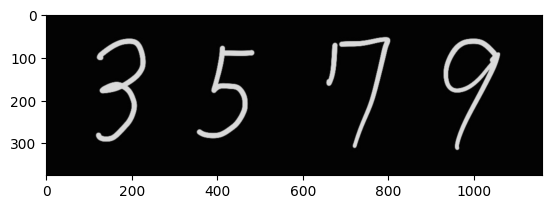

In [2]:
frame = 'digits_3579.jpg'

img = cv.imread(frame)
#plt.figure(figsize=(10, 10))
plt.imshow(img)
print(f'width: {img.shape[1]} pixels')
print(f'height: {img.shape[0]} pixels')
print(f'channels: {img.shape[2]}')

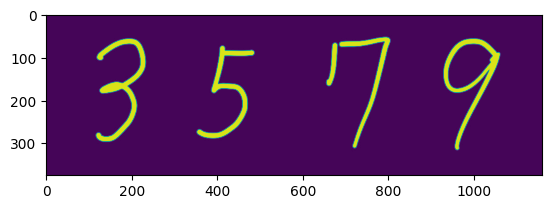

In [4]:
# hsv transform - value = gray image
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, saturation, value = cv.split(hsv)
plt.imshow(value)
plt.show()

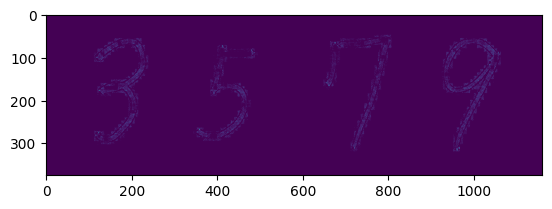

In [5]:
# kernel to use for morphological operations
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

# applying topHat operations
topHat = cv.morphologyEx(value, cv.MORPH_TOPHAT, kernel)
plt.imshow(topHat)
plt.show()

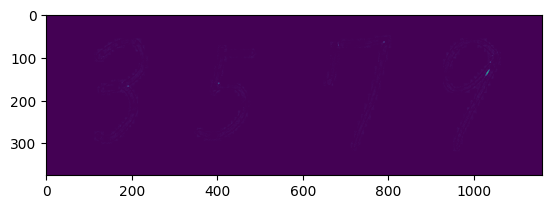

In [7]:
# applying blackHat operations
blackHat = cv.morphologyEx(value, cv.MORPH_BLACKHAT, kernel)
plt.imshow(blackHat)
plt.show()

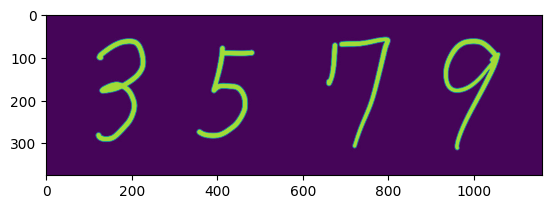

In [8]:
# add and subtract between morphological operations
add = cv.add(value, topHat)
subtract = cv.subtract(add, blackHat)
plt.imshow(subtract)
plt.show()

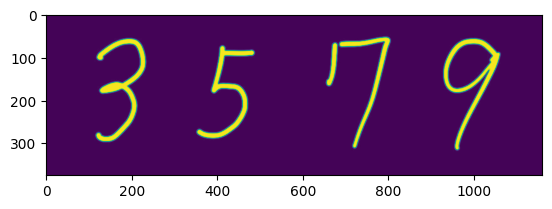

In [9]:
# applying gaussian blur on subtract image
blur = cv.GaussianBlur(subtract, (5, 5), 0)
plt.imshow(blur)
plt.show()

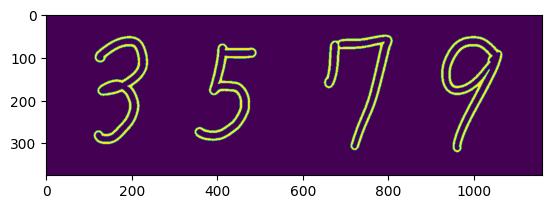

In [10]:
# thresholding
thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 19, 9)
plt.imshow(thresh)
plt.show()

In [12]:
# cv2.findContours() function changed from OpenCV3 to OpenCV4: now it have only two parameters instead of 3
cv2MajorVersion = cv.__version__.split(".")[0]
print('openCV version: ', cv2MajorVersion)
# check for contours on thresh
if int(cv2MajorVersion) >= 4:
    contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
else:
    imageContours, contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

openCV version:  4


946 1037 75 168
351 489 72 291
941 1045 70 173
347 493 69 296
654 683 65 169
929 1064 56 318
115 235 56 298
685 807 52 314
924 1068 51 322
111 239 51 303
650 811 48 317


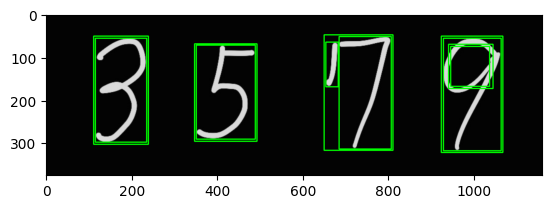

In [38]:
img_digits = []
img_origin = img.copy()
margin = 10

# loop to check if any (possible) contour is found
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    # Ignore if image is too small
    if w * h < 100: continue
    #Y and X [y-margin:y+h+margin, x-margin:x+w+margin]
    img_digits.append(img_origin[y-margin:y+h+margin, x-margin:x+w+margin])
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    print(x, x+w, y, y+h)
plt.imshow(img)
plt.show()

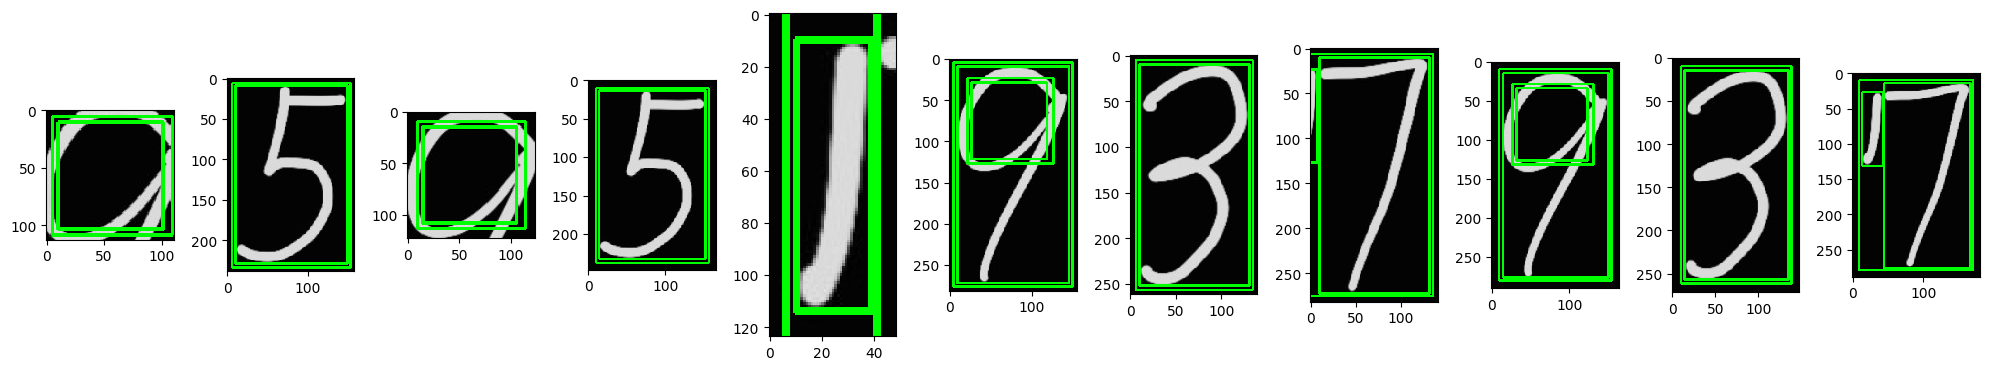

In [24]:
plt.figure(figsize=(20, 10))
for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    plt.imshow(img_digits[i], cmap='Greys', interpolation='nearest')
plt.tight_layout()
plt.show()

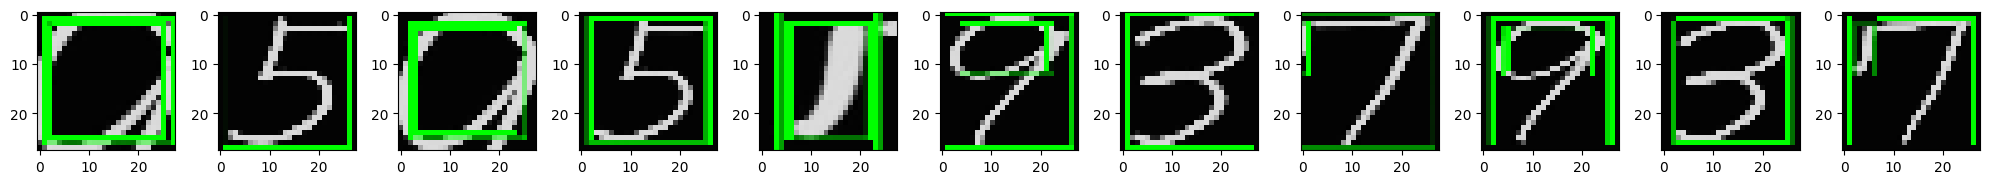

In [30]:
SZ = 28

plt.figure(figsize=(20, 10))
for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    plt.imshow(cv.resize(img_digits[i], (SZ, SZ)), cmap='Greys', interpolation='nearest')
plt.tight_layout()
plt.show()

In [32]:
import tensorflow as tf

model = tf.keras.models.load_model('digits_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 23ms/step
[0.005688839, 4.8344693e-11, 0.018859942, 0.0064372807, 6.90755e-08, 0.14071327, 0.00030967873, 1.174866e-05, 0.8279656, 1.3560049e-05]
1/1 [==============================] - 0s 22ms/step
[1.916519e-12, 3.5975173e-17, 0.00016169107, 1.5346094e-08, 1.2863107e-33, 0.999838, 2.2625272e-08, 4.1811116e-10, 2.0848854e-07, 9.285349e-22]
1/1 [==============================] - 0s 22ms/step
[0.00066630414, 2.1896556e-09, 0.07053943, 0.0010304136, 4.504356e-08, 0.7024925, 2.9652213e-07, 0.014668187, 0.16679871, 0.043804128]
1/1 [==============================] - 0s 24ms/step
[2.5703644e-05, 4.3818855e-12, 0.7235083, 3.1456297e-05, 3.1414746e-20, 0.27293125, 2.9562265e-05, 3.2492592e-06, 0.003470436, 3.953073e-13]
1/1 [==============================] - 0s 22ms/step
[5.8766537e-16, 4.8201293e-27, 1.2443293e-08, 1.3580435e-15, 0.0, 0.9999461, 2.669257e-14, 5.393095e-05, 9.331314e-21, 3.4866732e-20]
1/1 [==============================] - 0s 24ms/ste

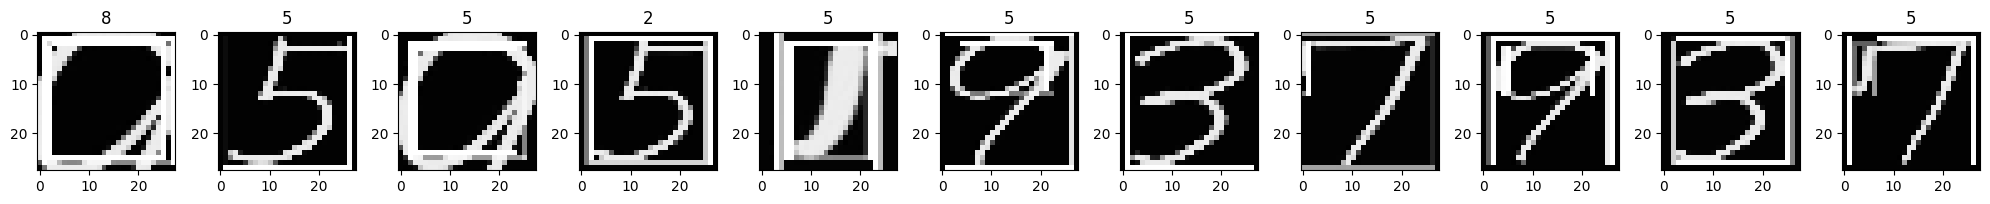

In [36]:
SZ = 28

plt.figure(figsize=(20, 10))
for i in range(0, len(img_digits)):
    plt.subplot(1, len(img_digits), i+1)
    num = cv.resize(img_digits[i], (SZ, SZ))[:,:,1]
    num = 255 - num    # Reverse
    num = num.astype('float32') / 255.
    plt.imshow(num, cmap='Greys', interpolation='nearest')
    result = model.predict(np.array([num]))
    result_number = np.argmax(result)
    plt.title(result_number)
    performance = [val for val in result[0]]
    print(performance)
plt.tight_layout()
plt.show()